In [2]:
#Sofias notebook
#Trees in NY

In [3]:
#Tip I received on how to know which branch I am on:

import subprocess
subprocess.check_output(["git", "rev-parse", "--abbrev-ref", "HEAD"])



b'Sofias_branch\n'

In [9]:
import pandas as pd

path_csv = "2015-street-tree-census-tree-data.csv"

df = pd.read_csv(path_csv)

df.shape

(683788, 45)

In [5]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27T00:00:00.000,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03T00:00:00.000,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05T00:00:00.000,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05T00:00:00.000,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30T00:00:00.000,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [6]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
df["borough"].isna().sum()

#No value with NA in column borough

np.int64(0)

In [8]:
tree_ny = df["borough"].value_counts()

tree_ny

borough
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: count, dtype: int64

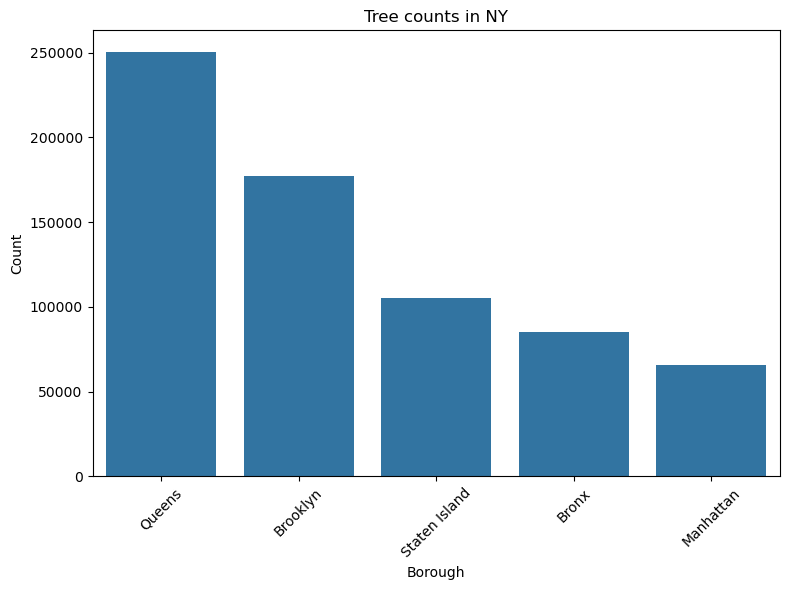

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(data=tree_ny_df, x='borough', y='count')
plt.title("Tree counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
path_noise = "Noise_complaint_mass.csv"

dfn = pd.read_csv(path_noise)

print(dfn.shape)

dfn.head()

(2440, 4)


(2440, 4)


,Location Type,City,Borough,num_calls
0,Club/Bar/Restaurant,STATEN ISLAND,STATEN ISLAND,40
1,Club/Bar/Restaurant,NEW YORK,MANHATTAN,18
2,Club/Bar/Restaurant,STATEN ISLAND,STATEN ISLAND,21
3,Club/Bar/Restaurant,NEW YORK,MANHATTAN,160
4,Club/Bar/Restaurant,BROOKLYN,BROOKLYN,17


In [15]:
dfn["Borough"].isna().sum()

np.int64(0)

In [16]:
noise_ny = dfn["Borough"].value_counts()

noise_ny

Borough
MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: count, dtype: int64

In [22]:
# Remove rows where Borough is "Unspecified"
dfn = dfn[dfn["Borough"] != "Unspecified"]

print(f"Shape after removing Unspecified: {dfn.shape}")
noise_ny = dfn["Borough"].value_counts()

Shape after removing Unspecified: (2435, 4)


In [23]:
noise_ny_df = noise_ny.reset_index()
noise_ny_df.columns = ['borough', 'count']

noise_ny_df

,borough,count
0,MANHATTAN,1076
1,BROOKLYN,736
2,QUEENS,418
3,BRONX,141
4,STATEN ISLAND,64


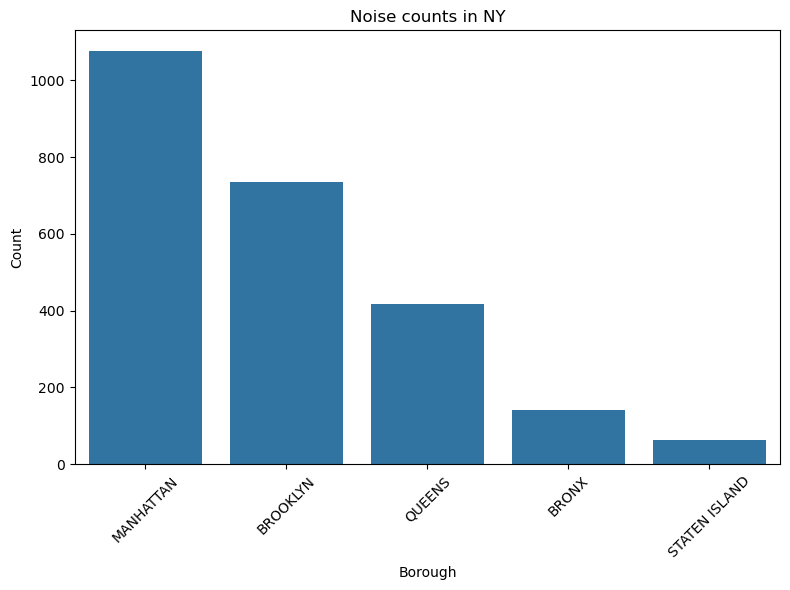

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=noise_ny_df, x='borough', y='count')
plt.title("Noise counts in NY")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import requests
import pandas as pd

# === CONFIG ===
API_KEY = "4b9323db6a394aafebd3fe5cd033de487371118153f3f1fb774462ad878cbe62"  # ⬅️ paste your key here
BASE_URL = "https://api.openaq.org/v3"
HEADERS = {"Authorization": f"Bearer {API_KEY}"}

def fetch_locations_in_bbox(bbox, parameter=None, limit=100):
    """Fetch all monitoring locations inside a bounding box (v3 API)."""
    all_results = []
    page = 1
    while True:
        params = {
            "bbox": f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}",
            "limit": limit,
            "page": page,
        }
        if parameter:
            params["parameter"] = parameter
        r = requests.get(f"{BASE_URL}/locations", headers=HEADERS, params=params)
        r.raise_for_status()
        data = r.json()
        results = data.get("results", [])
        if not results:
            break
        all_results.extend(results)
        if len(results) < limit:
            break
        page += 1
    return all_results


def fetch_measurements(location_id, parameter=None, date_from=None, date_to=None, limit=100):
    """Fetch measurements for a specific location ID (v3 API)."""
    all_results = []
    page = 1
    while True:
        params = {
            "location_id": location_id,
            "limit": limit,
            "page": page,
        }
        if parameter:
            params["parameter"] = parameter
        if date_from:
            params["date_from"] = date_from
        if date_to:
            params["date_to"] = date_to

        r = requests.get(f"{BASE_URL}/measurements", headers=HEADERS, params=params)
        if r.status_code == 404:
            break
        r.raise_for_status()

        data = r.json()
        results = data.get("results", [])
        if not results:
            break
        all_results.extend(results)
        if len(results) < limit:
            break
        page += 1
    return all_results


def get_borough_data(name, bbox, parameter="pm25", date_from="2025-01-01T00:00:00Z", date_to=None):
    print(f"\n📍 Fetching locations in {name}...")
    locations = fetch_locations_in_bbox(bbox, parameter=parameter)
    if not locations:
        print(f"⚠️  No locations found in {name}")
        return pd.DataFrame()

    print(f"   Found {len(locations)} monitoring locations")

    all_records = []
    for loc in locations:
        loc_id = loc["id"]
        loc_name = loc.get("name", "unknown")
        print(f"   ↳ Fetching data from {loc_name} (ID {loc_id}) ...")
        results = fetch_measurements(loc_id, parameter=parameter, date_from=date_from, date_to=date_to)
        for res in results:
            res["borough"] = name
        all_records.extend(results)

    if not all_records:
        print(f"⚠️  No measurements for {name}")
        return pd.DataFrame()

    return pd.DataFrame(all_records)


# Approximate borough bounding boxes
boroughs = {
    "Manhattan": (-74.03, 40.70, -73.93, 40.88),
    "Brooklyn": (-74.05, 40.57, -73.85, 40.74),
    "Queens": (-73.96, 40.54, -73.70, 40.80),
    "Bronx": (-73.93, 40.79, -73.76, 40.92),
    "Staten Island": (-74.25, 40.50, -74.05, 40.65),
}

# Example: fetch PM2.5 data for 2025
all_borough_data = []
for borough, bbox in boroughs.items():
    df = get_borough_data(borough, bbox)
    all_borough_data.append(df)

# Combine into one DataFrame
nyc_data = pd.concat(all_borough_data, ignore_index=True)
print("\n✅ Combined NYC data:", nyc_data.shape)
print(nyc_data.head())
columns.tolist()}")
            df_air.head()
        else:
            print("❌ No measurements found for the specified criteria")
            
except Exception as e:
    print(f"❌ Error: {e}")
    print("Make sure openaq is installed: pip install openaq")

In [1]:
import requests

API_KEY = "4b9323db6a394aafebd3fe5cd033de487371118153f3f1fb774462ad878cbe62"  # Replace with your key
BASE_URL = "https://api.openaq.org/v3"
HEADERS = {"X-API-Key": API_KEY}

params = {
    "bbox": "-74.268196,40.489402,-73.691714,40.921195", #put here the bbox and coordinates
    "limit": 100,
    "page": 1,
}

r = requests.get(f"{BASE_URL}/locations", headers=HEADERS, params=params)
data = r.json()
print(f"Found {data['meta']["found"]} locations.")
data["results"][0]

Found 54 locations.


{'id': 384,
 'name': 'CCNY',
 'locality': 'New York-Northern New Jersey-Long Island',
 'timezone': 'America/New_York',
 'country': {'id': 155, 'code': 'US', 'name': 'United States'},
 'owner': {'id': 4, 'name': 'Unknown Governmental Organization'},
 'provider': {'id': 119, 'name': 'AirNow'},
 'isMobile': False,
 'isMonitor': True,
 'instruments': [{'id': 2, 'name': 'Government Monitor'}],
 'sensors': [{'id': 671,
   'name': 'o3 ppm',
   'parameter': {'id': 10, 'name': 'o3', 'units': 'ppm', 'displayName': 'O₃'}},
  {'id': 673,
   'name': 'pm25 µg/m³',
   'parameter': {'id': 2,
    'name': 'pm25',
    'units': 'µg/m³',
    'displayName': 'PM2.5'}}],
 'coordinates': {'latitude': 40.8197, 'longitude': -73.9481},
 'licenses': [{'id': 33,
   'name': 'US Public Domain',
   'attribution': {'name': 'Unknown Governmental Organization', 'url': None},
   'dateFrom': '2016-01-30',
   'dateTo': None}],
 'bounds': [-73.9481, 40.8197, -73.9481, 40.8197],
 'distance': None,
 'datetimeFirst': {'utc': '2

In [ ]:
#fazer uma tabela so com a localizacao e os sensores
#fazer uma dict: localizacao (coordinates) e sensor id

In [12]:
all_sensors = {}

for i in range(len(data["results"])):
    # Get the bounds (coordinates) as a tuple to use as dictionary key
    bounds = data["results"][i]["bounds"]
    location_key = (bounds[0], bounds[1])  # (longitude, latitude)
    
    # Get all sensor IDs for this location
    sensor_ids = []
    for j in range(len(data["results"][i]["sensors"])):
        sensor_id = data["results"][i]["sensors"][j]["id"]
        sensor_ids.append(sensor_id)
    
    # Store in dictionary
    all_sensors[location_key] = sensor_ids

# Convert dictionary to DataFrame properly
sensors_data = []
for location, sensors in all_sensors.items():
    longitude, latitude = location
    for sensor_id in sensors:
        sensors_data.append({
            'longitude': longitude,
            'latitude': latitude,
            'sensor_id': sensor_id
        })

sensors_pd = pd.DataFrame(sensors_data)

sensors_pd.to_csv("all_sensors.csv")

In [ ]:
params_meas = {
    "limit": 100,
    "page": 1,
}

r_meas = requests.get(f"{BASE_URL}/sensors/671/years", headers=HEADERS, params=params_meas)
data_meas = r_meas.json()
#print(f"Found {data_meas['meta']} locations.")


Found {'name': 'openaq-api', 'website': '/', 'page': 1, 'limit': 100, 'found': 9} locations.


In [7]:
data_meas["results"][0]

{'value': 0.0172,
 'flagInfo': {'hasFlags': False},
 'parameter': {'id': 10, 'name': 'o3', 'units': 'ppm', 'displayName': None},
 'period': {'label': '1year',
  'interval': '1 year',
  'datetimeFrom': {'utc': '2016-01-01T05:00:00Z',
   'local': '2016-01-01T00:00:00-05:00'},
  'datetimeTo': {'utc': '2017-01-01T05:00:00Z',
   'local': '2017-01-01T00:00:00-05:00'}},
 'coordinates': None,
 'summary': {'min': 0.0,
  'q02': 0.0010000000474974513,
  'q25': 0.008999999612569809,
  'median': 0.017000000923871994,
  'q75': 0.024250000715255737,
  'q98': 0.04292000085115433,
  'max': 0.04600000008940697,
  'avg': 0.01722368411719799,
  'sd': 0.010914597660303116},
 'coverage': {'expectedCount': 8784,
  'expectedInterval': '8784:00:00',
  'observedCount': 152,
  'observedInterval': '152:00:00',
  'percentComplete': 2.0,
  'percentCoverage': 2.0,
  'datetimeFrom': {'utc': '2016-03-12T09:00:00Z',
   'local': '2016-03-12T04:00:00-05:00'},
  'datetimeTo': {'utc': '2016-12-29T04:00:00Z',
   'local': '2

In [ ]:
#-74.268196,40.489402,-73.691714,40.921195

In [23]:
import sys
print(sys.executable)

c:\Users\Sofia\anaconda3\python.exe


In [ ]:
#conda activate blablabla
#pip install openaq